In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [3]:
model.add(Flatten())  # 이전 CNN 레이어에서 나온 3차원 배열은 1차원으로 뽑아줍니다
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',# 원래는 binary_crossentropy인데 오류가 떠서 이렇게 바꿈
              optimizer='rmsprop',
              metrics=['accuracy'])

In [4]:
batch_size = 16

# 학습 이미지에 적용한 augmentation 인자를 지정해줍니다.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# 검증 및 테스트 이미지는 augmentation을 적용하지 않습니다. 모델 성능을 평가할 때에는 이미지 원본을 사용합니다.
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        './train',  # this is the target directory
        target_size=(150, 150),  # 모든 이미지의 크기가 150x150로 조정됩니다.
        batch_size=batch_size,
        class_mode='binary')  # binary_crossentropy 손실 함수를 사용하므로 binary 형태로 라벨을 불러와야 합니다.

validation_generator = validation_datagen.flow_from_directory(
        './test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        './test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 812 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [5]:
result = model.fit_generator(
        train_generator,
        steps_per_epoch=1000 // batch_size,
        validation_data=validation_generator,
        epochs=10)
model.save_weights('first_try.h5')  # 많은 시간을 들여 학습한 모델인 만큼, 학습 후에는 꼭 모델을 저장해줍시다.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/10
62/62 [==============================] - ETA: 0s - batch: 30.5000 - size: 15.9355 - loss: 0.8024 - acc: 0.6437

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


62/62 [==============================] - 25s 399ms/step - batch: 30.5000 - size: 15.9355 - loss: 0.8024 - acc: 0.6437 - val_loss: 0.5464 - val_acc: 0.7875
Epoch 2/10
62/62 [==============================] - 24s 396ms/step - batch: 30.5000 - size: 15.8710 - loss: 0.4803 - acc: 0.7896 - val_loss: 0.6053 - val_acc: 0.5125
Epoch 3/10
62/62 [==============================] - 24s 396ms/step - batch: 30.5000 - size: 16.0000 - loss: 0.3593 - acc: 0.8407 - val_loss: 0.2881 - val_acc: 0.8750
Epoch 4/10
62/62 [==============================] - 24s 392ms/step - batch: 30.5000 - size: 15.8710 - loss: 0.3251 - acc: 0.8720 - val_loss: 0.3256 - val_acc: 0.8750
Epoch 5/10
62/62 [==============================] - 25s 398ms/step - batch: 30.5000 - size: 15.9355 - loss: 0.2537 - acc: 0.8978 - val_loss: 0.2711 - val_acc: 0.8875
Epoch 6/10
62/62 [==============================] - 25s 399ms/step - batch: 30.5000 - size: 15.9355 - loss: 0.2839 - acc: 0.8998 - val_loss: 0.1935 - val_acc: 0.9125
Epoch 7/10
62/6

In [6]:
import matplotlib.pyplot as plt

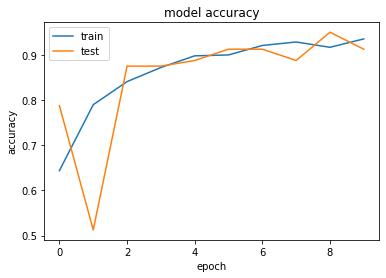

In [8]:
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

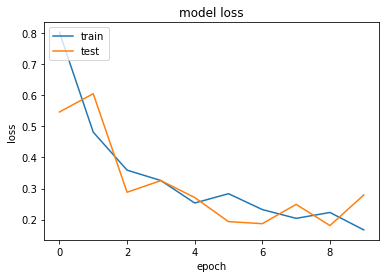

In [9]:
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()